Hello, This is my Data mining project 2. Today, we will be doing analysis and creating a classification model using the Road Accident Survival Dataset. Road accidents are a huge concern worldwide, leading to many injuries and fatalities every year. Having the ability to be able to predict the survival outcome of an individual involved in a road accident based on several factors can enhance the emergency response strategies, improving the safety measures of roads, and assist in the decisions made in the medical field. 

### The aim of this analysis

Today I will assume the role of a data analyst working at a major auto company, I need to analyze the Road Accident Survival Dataset and develop a classification model that can accurately predict the survival outcome of an individual involved in a road accident. Some of the questions we aim to answer include the following:

- Which factors are most important in determining the survival outcome of an individual involved in a road accident?
- Can we identify any patterns or trends in the data that may help us make more informed decisions when planning road safety measures?
- Can we build a predictive model that can accurately classify the survival outcome of an individual involved in a road accident based on the available data?

### About the data

The link to the dataset: [Road Accident Survival Dataset](https://www.kaggle.com/datasets/himelsarder/road-accident-survival-dataset)

The Road Accident Survival Dataset was found on kaggle.com. The dataset contains information about individuals involved in road accidents, with multiple features that could influence the odds of survival. The features of the dataset are: 
- Age: The age of the individual involved in the accident
- Gender: The gender of the individual involved in the accident
- Speed_of_Impact: The speed at when the impact happened
- Helmet_Used: If the individual was wearing a helmet at the time of the accident
- Seatbelt_Used: If the individual was wearing a Seatbelt at the time of the accident
- Survived: The target variable indicating whether the individual survived the accident

The Dataset contains 200 records and 6 columns


### Exploring and cleaning the data

Before we start doing analysis and creating the model, we need to explore and clean the data to identify any missing values, well structured, and suitable for a classification model.

In [67]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [68]:
# Creating a dataframe
df = pd.read_csv("/Users/ahmadjebril/Downloads/accident.csv")
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [69]:
# Looking at the datatypes
df.dtypes

Age                  int64
Gender              object
Speed_of_Impact    float64
Helmet_Used         object
Seatbelt_Used       object
Survived             int64
dtype: object

In [70]:
# we can look at the shape and the index values of the dataset
print("The index is: " + str(df.index))
print("The shape is: " + str(df.shape))

The index is: RangeIndex(start=0, stop=200, step=1)
The shape is: (200, 6)


In [71]:
# Summary statistics
df.describe()

,Age,Speed_of_Impact,Survived
count,200.00000,197.000000,200.00000
mean,43.42500,70.441624,0.50500
std,14.94191,30.125298,0.50123
min,18.00000,20.000000,0.00000
25%,31.00000,43.000000,0.00000
50%,43.50000,71.000000,1.00000
75%,56.00000,95.000000,1.00000
max,69.00000,119.000000,1.00000


In [72]:
# Checking for null values
df.isnull().sum()

Age                0
Gender             1
Speed_of_Impact    3
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

We have a few missing values! Before we preprocess the data we need to deal with the missing values:

In [73]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Speed_of_Impact'].fillna(df['Speed_of_Impact'].median(), inplace = True)
df.isnull().sum()

/var/folders/0h/4h_5sph55tb7sm0f43y28fsr0000gn/T/ipykernel_34508/4097031295.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
/var/folders/0h/4h_5sph55tb7sm0f43y28fsr0000gn/T/ipykernel_34508/4097031295.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

Age                0
Gender             0
Speed_of_Impact    0
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

The issue is settled! 

### Preprocessing the data

1. We need to encode categorical variables (Gender, Helmet_used, and Seatbelt_Used) for the model to be able to use.

In [74]:
label_encoders = {} # creating an empty dictionary to store label encoder objects for each column allowing us to convert back later if needed
for col in ['Gender', 'Helmet_Used', 'Seatbelt_Used']: # loop through each column
    label_encoder = LabelEncoder() #initialize
    df[col] = label_encoder.fit_transform(df[col]) # learns unique labels and assigns a numeric value
    label_encoders[col] = label_encoder # storing the object in the dictionary

In [75]:
# Checking to make sure everything went accordingly
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,0,27.0,0,0,1
1,69,0,46.0,0,1,1
2,46,1,46.0,1,1,0
3,32,1,117.0,0,1,0
4,60,0,40.0,1,1,0


2. We need to scale the numerical features using standardization
- Since Speed_of_Impact is a continuous variable that potentially might have varying magnitudes, we need to scale it to have a consistent range!

In [76]:
scaler = StandardScaler() # Initializing the scaler
df ['Speed_of_Impact'] = scaler.fit_transform(df[['Speed_of_Impact']]) # Applying the scaler

3. We need to check for class imbalances
- The target variable 'Survived' should be checked for class imbalances. We could use techniques like oversampling or undersampling to balance the dataset if one class is significantly more frequent than the other.

In [77]:
# Checking the class distribution
print("Class Distribution:")
print(df['Survived'].value_counts(normalize=True)) # counting the number of occurrences for each class and returning proportions instead of raw counts

Class Distribution:
Survived
1    0.505
0    0.495
Name: proportion, dtype: float64


We can also plot and visualize the class distribution!

/var/folders/0h/4h_5sph55tb7sm0f43y28fsr0000gn/T/ipykernel_34508/4159154800.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Survived'], palette='coolwarm')


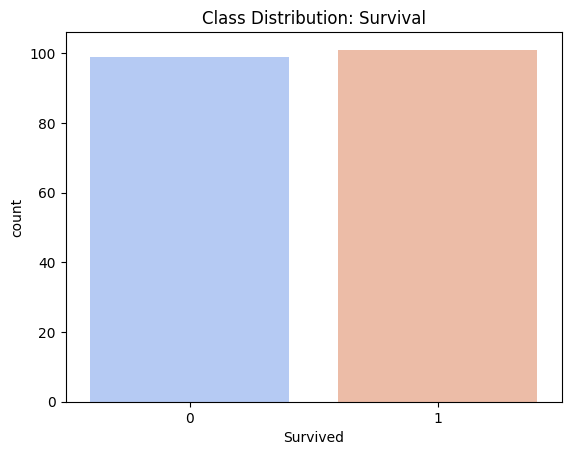

In [91]:
# Plotting the class distribution
sns.countplot(x=df['Survived'], palette='coolwarm')
plt.title("Class Distribution: Survival")
plt.show()

The proportions of the classes are similar indicating a balanced dataset, which mean that we could use a standard classification model!

4. We could analyze the categorical features and their impact on Survival

/var/folders/0h/4h_5sph55tb7sm0f43y28fsr0000gn/T/ipykernel_34508/914043442.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Survived', data=df, palette='coolwarm')


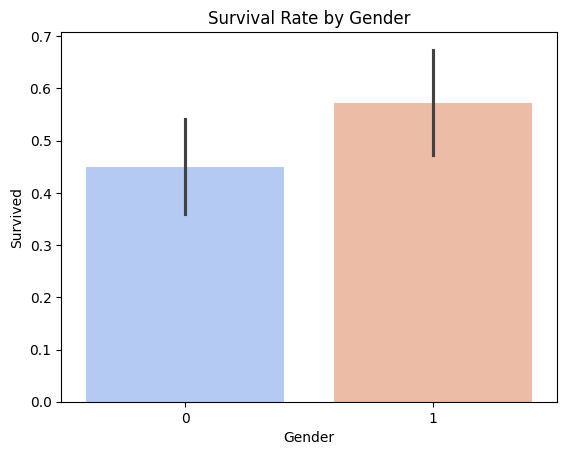

/var/folders/0h/4h_5sph55tb7sm0f43y28fsr0000gn/T/ipykernel_34508/914043442.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Helmet_Used', y='Survived', data=df, palette='coolwarm')


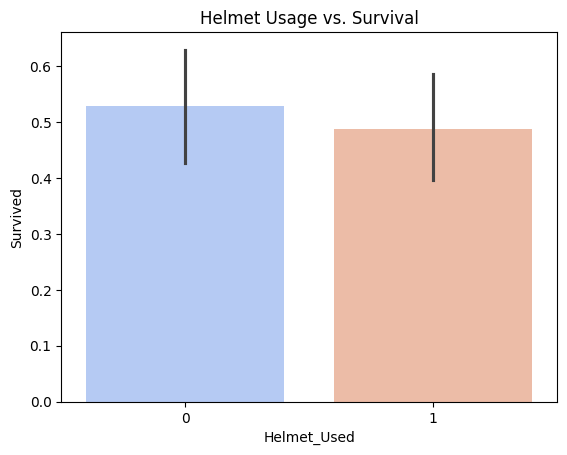

/var/folders/0h/4h_5sph55tb7sm0f43y28fsr0000gn/T/ipykernel_34508/914043442.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Seatbelt_Used', y='Survived', data=df, palette='coolwarm')


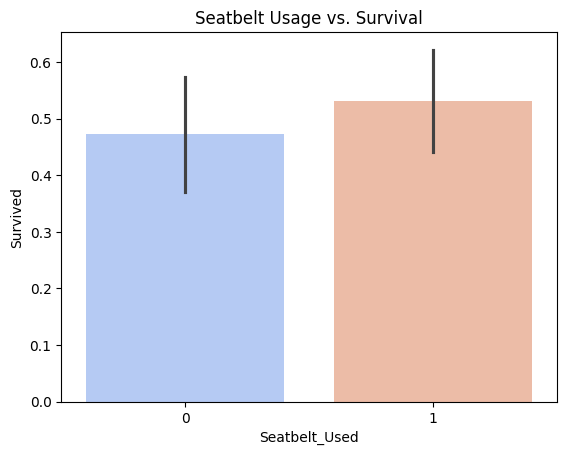

In [92]:
# Survival Rate by Gender
sns.barplot(x='Gender', y='Survived', data=df, palette='coolwarm')
plt.title("Survival Rate by Gender")
plt.show()

# Helmet Usage and Survival
sns.barplot(x='Helmet_Used', y='Survived', data=df, palette='coolwarm')
plt.title("Helmet Usage vs. Survival")
plt.show()

# Seatbelt Usage and Survival
sns.barplot(x='Seatbelt_Used', y='Survived', data=df, palette='coolwarm')
plt.title("Seatbelt Usage vs. Survival")
plt.show()

we could detect patterns looking at the barplots! for example, wearing a seatbelt increases the survival chances. 

5. It is time to split the dataset and create the classification model

In [78]:
X = df.drop(columns=['Survived']) # The features
y = df['Survived'] # The target variable

In [79]:
# Creating the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [80]:
# Checking the shapes of the training and testing sets
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (160, 5)
Test set shape: (40, 5)


### Modeling

Now that we have preprocessed the data, we can start building and evaluating classification models to predict survival in road accidents!
The Classification models we will use today are:
- Logistic Regression
- Random Forest
- XGBoost

Each model has its own strengths and weakness, which is why we will evaluate them to figure out which one works better for our dataset

##### Logistic Regression

Logistic Regression is a statistical model used for binary classification. Using the sigmoid function, it estimates the probability to which class an instance belongs to.

How does Logistic Regression work?
- The model computes a weighted sum of the input features
- The sum is passed through a sigmoid function to squash the output between 0 and 1
- If the probability is above a certain threshold, it predicts 1. Otherwise, it predicts 0

Pros?
- Very simple and easy to understand
- Works well when the features are linearly separable

Cons?
- Assumes a linear decision boundary 
- Cannot handle complex patterns very well


In [81]:
# Initializing and training the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [82]:
# predictions
logistic_predictor = log_reg.predict(X_test)

In [83]:
# evaluating the model
logistic_accuracy = accuracy_score(y_test, logistic_predictor)
print(f"Logistic Regression Accuracy: {logistic_accuracy:.4f}")

Logistic Regression Accuracy: 0.5500


##### Random Forest

Random Forest is an ensemble learning method which creates multiple decision trees and combines their outputs.

How does Random Forest work?
- Builds multiple decision trees on different subsets of the data using Bootstrap sampling
- Each tree makes a prediction, and the majority vote is the final prediction used for classification

Pros?
- Handles missing data and outliers well
- Works well on large datasets
- Less prone to overfitting compared to a single decision tree

Cons?
- Computationally expensive
- Harder to interpret than Logistic Regression


In [84]:
# Initializing and training the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [85]:
# Predictions
random_forest_predictor = rf_model.predict(X_test)

In [86]:
# Evaluating the model
rf_accuracy = accuracy_score(y_test, random_forest_predictor)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.6000


##### XGBoost 

XGBoost is a gradient boosting algorithm that builds decision tree sequentially, with each tree correcting the errors of the previous tree. 

How does XGBoost work?
- Builds trees sequentially and adjusts weights based on previous errors
- Uses gradient descent to optimize the tree's construction
- Applies regularization techniques to avoid overfitting

Pros?
- great predictive power
- automated handling of missing values
- can be fine tuned for best performance

Cons?
- Computationally expensive
- Hyperparameter tuning is required


In [87]:
# Initializing and training the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

[18:16:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [88]:
# Predictions
xgb_predictor = xgb_model.predict(X_test)

In [89]:
# Evaluating the model
xgb_accuracy = accuracy_score(y_test, xgb_predictor)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

XGBoost Accuracy: 0.6000


It appears that all three models have around the same accuracy! we could print a classification report to compare their performance using multiple metrics, such as the Precision, Recall, and the F1 Score.

In [90]:
# Classification reports for all the models
print("\nLogistic Regression:\n", classification_report(y_test, logistic_predictor))
print("\nRandom Forest:\n", classification_report(y_test, random_forest_predictor))
print("\nXGBoost:\n", classification_report(y_test, xgb_predictor))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.54      0.70      0.61        20
           1       0.57      0.40      0.47        20

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.54        40
weighted avg       0.55      0.55      0.54        40


Random Forest:
               precision    recall  f1-score   support

           0       0.60      0.60      0.60        20
           1       0.60      0.60      0.60        20

    accuracy                           0.60        40
   macro avg       0.60      0.60      0.60        40
weighted avg       0.60      0.60      0.60        40


XGBoost:
               precision    recall  f1-score   support

           0       0.62      0.50      0.56        20
           1       0.58      0.70      0.64        20

    accuracy                           0.60        40
   macro avg       0.60      0.60      0.60        40
weighted avg       0.60

We can conclude that both the Random Forest and the XGBoost models have the same accuracy, and are the best performing models for our classification task! we could fine tune the hyperparameters for better performance as well.

### Impact of this project



##### Social Impacts
- Promoting road safety awareness, potentially encouraging safer driving behaviors and improving public safety campaigns! 
- Policymakers might introduce stricter traffic laws and city planners might design safer road systems in high risk areas
- Healthcare system improvements, such as resource allocation to road accident trauma units and prioritizing accident victims based on survival probabilities

##### Ethical Considerations
- The data might contain sensitive personal information and could be exploited by insurance companies to discriminate against high risk individuals if misused
- The model might incorrectly predict a low chance of survival influencing the emergency response decisions
- The model might make unfair predictions if the dataset is biased

##### Possible Negative Consequences 
- Insurance using the model to adjust their rates
- Introducing false sense of security and being very dependent on the model's predictions
- If predictions are incorrect, this might lead to legal and liability issues



### References

- ChatGPT : I used ChatGPT to help me understand some aspects of this project, such as getting help with understanding the models
- Keggle.com : I used the Road accident survival dataset from keggle
- Canvas : I used available resources from modules in Canvas